In [120]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd

import lib.baseline as baseline
import lib.util as util
from lib.baycon import baycon_explainer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


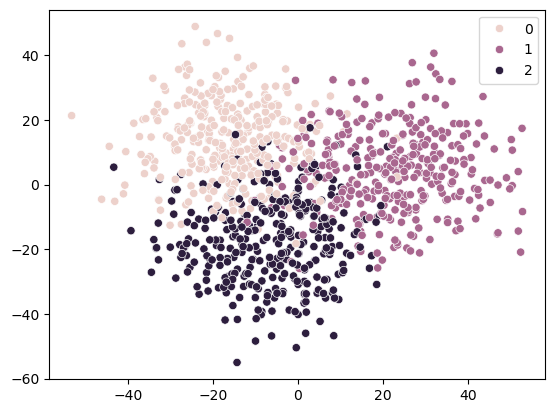

In [112]:
X, y = make_blobs(centers=3, cluster_std=12, n_features=20, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=eX[:, 0], y=eX[:, 1], hue=y)
plt.show()

In [113]:
idx = 0
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 0


In [122]:
explainer = baycon_explainer
classifier = MLPClassifier(hidden_layer_sizes=(4,4))
# classifier = LogisticRegression()
# classifier = RandomForestClassifier()
cf = baseline.baseline_explainer(X, y, classifier, explainer, idx, target_cluster=target_cluster, binary=True)

/nix/store/zfc0ci36l78c0pa9d31v8k4iz9mhbsz1-python3-3.12.8-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Done training classifier. Score: 0.9235382308845578
--- Executing... Initial Instance: 0 Target: 2 Run: 0 ---
--- Step 0: Load internal objects ---
--- Step 1: Generate initial neighbours ---
Generated initial neighbours: (650) CFs (0)
Re-training surrogate model with data size: 650
--- Step 2: Explore neighbourhood ---
--- epoch 1 ----
Generating neighbors for 1 near best instances
Generated neighbours: (0) Unique overall (0)
Generated random instances: (3250)
Predicted top: 20 Counterfactuals: 8
Found new best [-23.23158926 -13.49427292  -6.15518693  13.04622497 -19.87512519
 -10.40128513  -1.78810985  -5.60418199   9.31895152 -21.60832336
 -16.99836074   5.78551334   6.01044346   8.58383471  15.30853523
 -13.99106939 -11.38857557 -14.19975181   2.00271444  -1.73903884], with fitness score 0.7370 (X 0.92123 Y 1.0 F 0.8), oversampling
Known alternatives: 670
Best instance score 0.7370 (X 0.92123 Y 1.0 F 0.8), found on epoch: 1
Re-training surrogate model with data size: 680
--- epoch 

Data has more than 2 features. Using PCA!


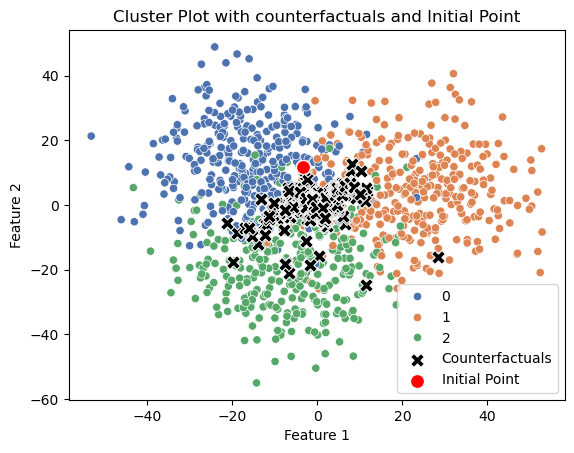

In [121]:
util.plot_cluster_cf(X, y, cf, idx)